In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
import fsspec
from matplotlib import pyplot
from matplotlib import colormaps
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from metpy.plots import USCOUNTIES
import numpy
import pandas
from PIL import Image
import pyart
from pyart.testing import get_test_data
import random
import xarray as xr


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# Define Output Directory
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/Radar_Meteo/HW4/'

In [3]:
# List Files
FS = fsspec.filesystem("s3", anon=True)
Files = sorted(FS.glob("s3://noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_20*"))
Files

['noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_200356_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_200811_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_201229_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_201643_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_202058_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_202511_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_202928_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_203346_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_203800_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_204215_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_204630_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_205045_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_205459_V06.gz',
 'noaa-nexrad-level2/2013/05/20/KTLX/KTLX20130520_205914_V06.gz']

In [4]:
# Read Radar
Radar = pyart.io.read_nexrad_archive(f's3://{Files[3]}')
list(Radar.fields)

['differential_phase',
 'velocity',
 'reflectivity',
 'cross_correlation_ratio',
 'differential_reflectivity',
 'spectrum_width']

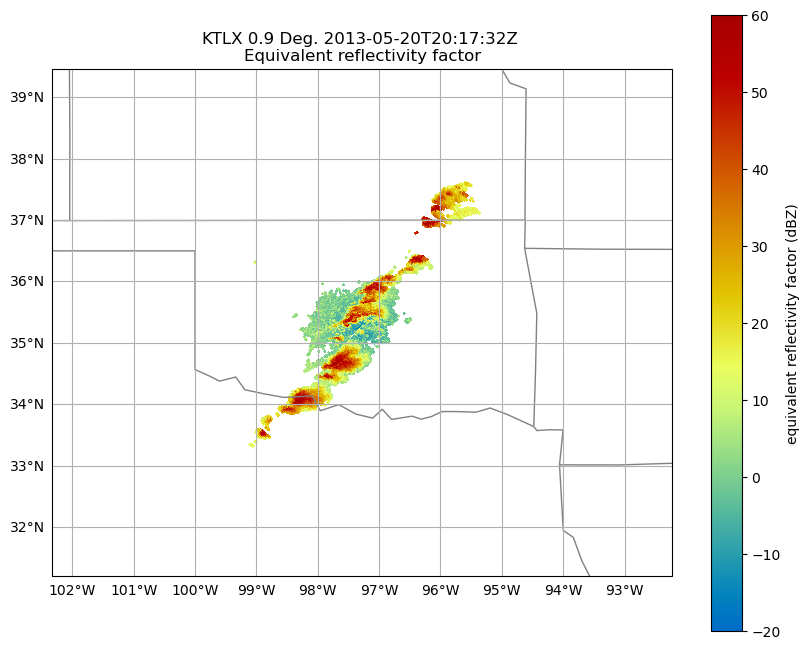

In [11]:
# Plot Reflectivity
Fig = pyplot.figure(figsize=[10,8])
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('reflectivity', sweep=3, vmin=-20, vmax=60, \
projection=ccrs.PlateCarree())
Fig.savefig(Output_Diri+'Q1.1.png', bbox_inches='tight')

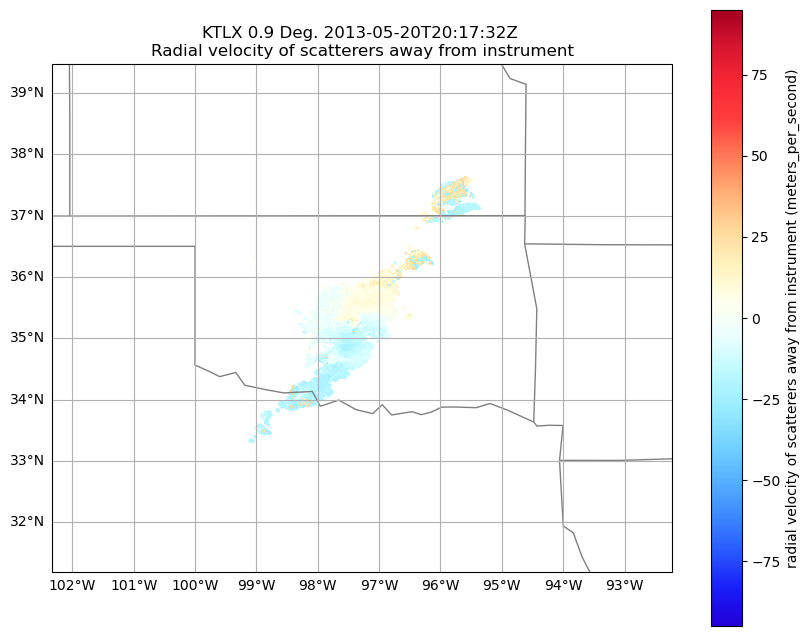

In [12]:
# Plot Velocity
Fig = pyplot.figure(figsize=[10,8])
Display.plot_ppi_map('velocity', sweep=3, \
projection=ccrs.PlateCarree())
Fig.savefig(Output_Diri+'Q1.2.png', bbox_inches='tight')

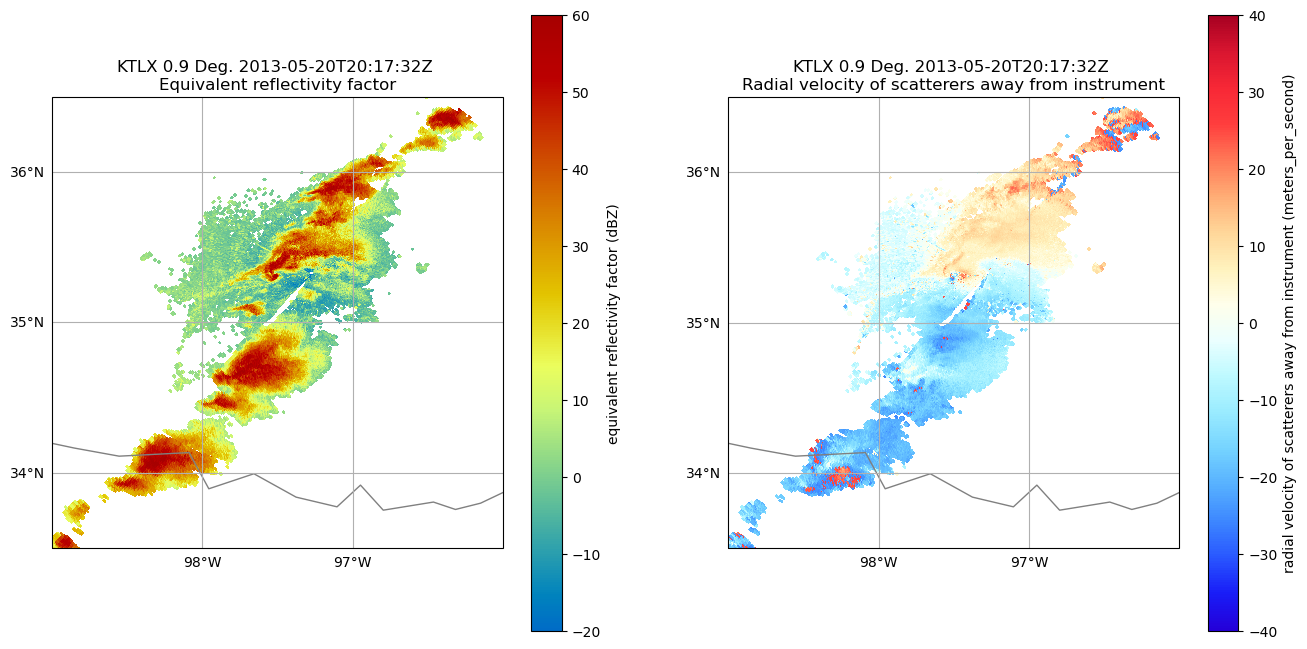

In [13]:
# Create Fig
Fig = pyplot.figure(figsize=[16,8])
#
# Plot Reflectivity
Ax1 = pyplot.subplot(121, projection=ccrs.PlateCarree())
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('reflectivity', sweep=3, vmin=-20, vmax=60, ax=Ax1)
# Set xlim and ylim
pyplot.xlim(-99,-96)
pyplot.ylim(33.5,36.5)
#
# Plot Velocity
Ax2 = pyplot.subplot(122, projection=ccrs.PlateCarree())
Display.plot_ppi_map('velocity', sweep=3, vmin=-40, vmax=40, ax=Ax2)
# Set xlim and ylim
pyplot.xlim(-99,-96)
pyplot.ylim(33.5,36.5)
#
# Savefig
pyplot.show()
Fig.savefig(Output_Diri+'Q1.3.png', bbox_inches='tight')

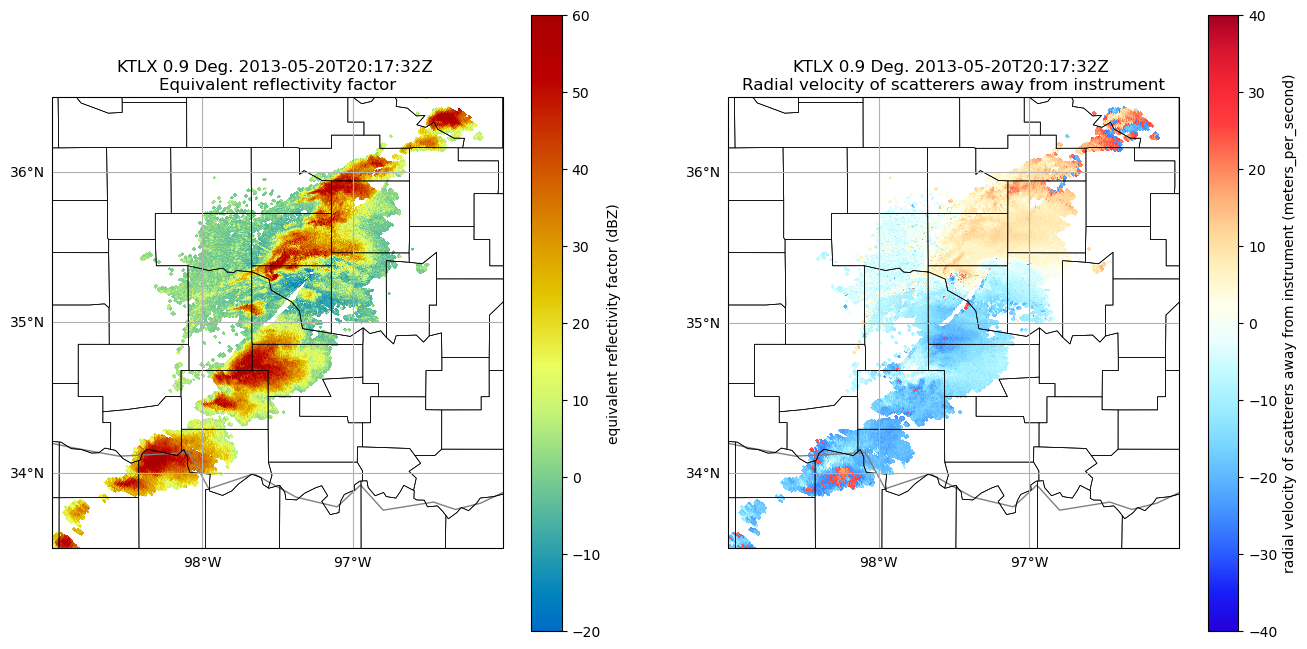

In [14]:
# Create Fig
Fig = pyplot.figure(figsize=[16,8])
#
# Plot Reflectivity
Ax1 = pyplot.subplot(121, projection=ccrs.PlateCarree())
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('reflectivity', sweep=3, vmin=-20, vmax=60, ax=Ax1)
# Set xlim and ylim
pyplot.xlim(-99,-96)
pyplot.ylim(33.5,36.5)
# Add Counties
Ax1.add_feature(USCOUNTIES, linewidth=0.5)
#
# Plot Velocity
Ax2 = pyplot.subplot(122, projection=ccrs.PlateCarree())
Display.plot_ppi_map('velocity', sweep=3, vmin=-40, vmax=40, ax=Ax2)
# Set xlim and ylim
pyplot.xlim(-99,-96)
pyplot.ylim(33.5,36.5)
Ax2.add_feature(USCOUNTIES, linewidth=0.5)
#
# Savefig
pyplot.show()
Fig.savefig(Output_Diri+'Q1.4.png', bbox_inches='tight')

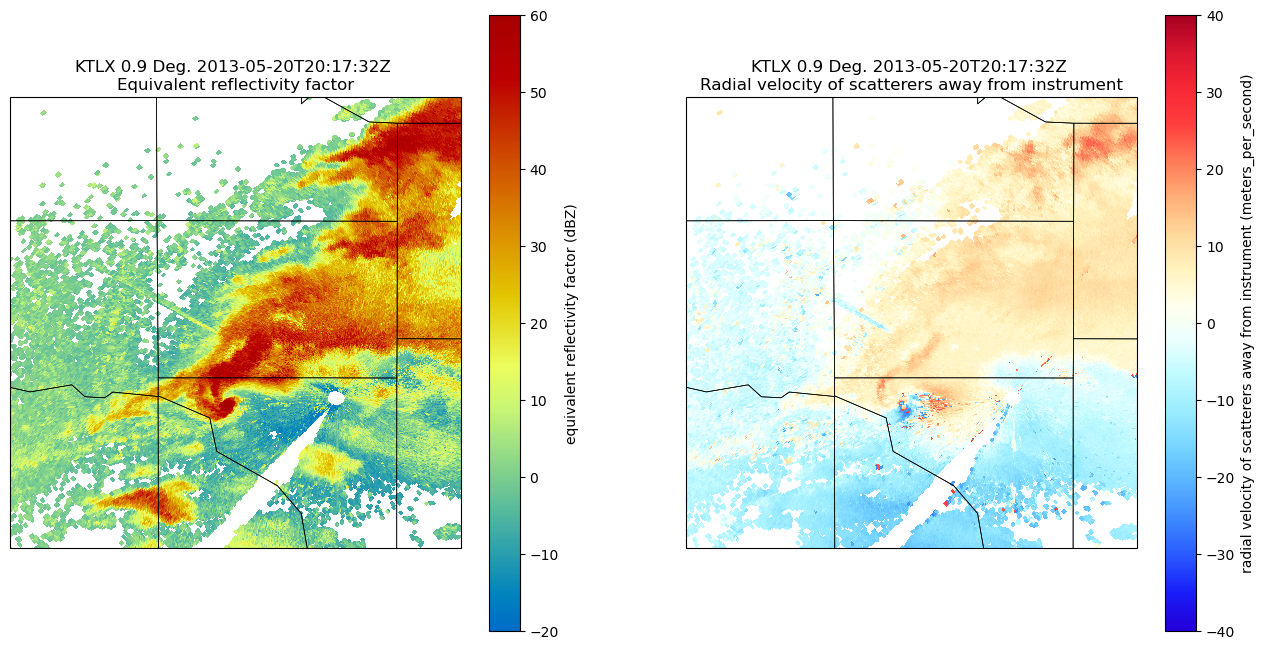

In [15]:
# Create Fig
Fig = pyplot.figure(figsize=[16,8])
#
# Plot Reflectivity
Ax1 = pyplot.subplot(121, projection=ccrs.PlateCarree())
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('reflectivity', sweep=3, vmin=-20, vmax=60, ax=Ax1)
# Set xlim and ylim
pyplot.xlim(-98,-97)
pyplot.ylim(35,36)
# Add Counties
Ax1.add_feature(USCOUNTIES, linewidth=0.5)
#
# Plot Velocity
Ax2 = pyplot.subplot(122, projection=ccrs.PlateCarree())
Display.plot_ppi_map('velocity', sweep=3, vmin=-40, vmax=40, ax=Ax2)
# Set xlim and ylim
pyplot.xlim(-98,-97)
pyplot.ylim(35,36)
Ax2.add_feature(USCOUNTIES, linewidth=0.5)
#
# Savefig
pyplot.show()
Fig.savefig(Output_Diri+'Q1.5.png', bbox_inches='tight')

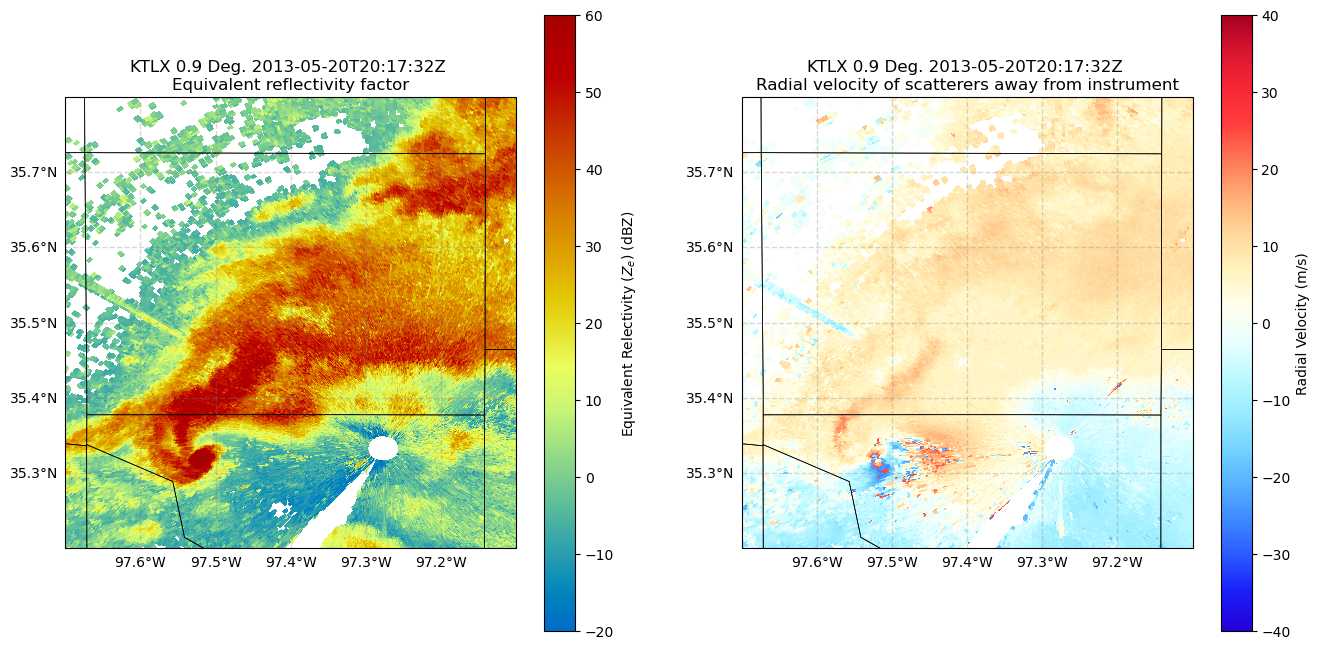

In [16]:
# Create Fig
Fig = pyplot.figure(figsize=[16,8])
#
# Plot Reflectivity
Ax1 = pyplot.subplot(121, projection=ccrs.PlateCarree())
Display = pyart.graph.RadarMapDisplay(Radar)
Display.plot_ppi_map('reflectivity', sweep=3, vmin=-20, vmax=60, ax=Ax1, \
colorbar_label='Equivalent Relectivity ($Z_{e}$) (dBZ)')
# Set xlim and ylim
pyplot.xlim(-97.7,-97.1)
pyplot.ylim(35.2,35.8)
# Add Gridlines
Gridlines = Ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, 
color='gray', alpha=0.3, linestyle='--')
# Labels Only Left and Bottom
Gridlines.top_labels = False
Gridlines.right_labels = False
# Set Gridline Labels Fontsize
Gridlines.xlabel_style = {'fontsize':10}
Gridlines.ylabel_style = {'fontsize':10}
# Add Counties
Ax1.add_feature(USCOUNTIES, linewidth=0.5)
#
# Plot Velocity
Ax2 = pyplot.subplot(122, projection=ccrs.PlateCarree())
Display.plot_ppi_map('velocity', sweep=3, vmin=-40, vmax=40, ax=Ax2, \
colorbar_label='Radial Velocity (m/s)')
# Set xlim and ylim
pyplot.xlim(-97.7,-97.1)
pyplot.ylim(35.2,35.8)
# Add Gridlines
Gridlines = Ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, 
color='gray', alpha=0.3, linestyle='--')
# Labels Only Left and Bottom
Gridlines.top_labels = False
Gridlines.right_labels = False
# Set Gridline Labels Fontsize
Gridlines.xlabel_style = {'fontsize':10}
Gridlines.ylabel_style = {'fontsize':10}
Ax2.add_feature(USCOUNTIES, linewidth=0.5)
#
# Savefig
pyplot.show()
Fig.savefig(Output_Diri+'Q1.6.png', bbox_inches='tight')